In [113]:
import simplejson
import requests
# import calendar
import pandas as pd
# import matplotlib.pyplot as plt

In [7]:
api_key = 'X27HC5SP5PEJ5F9B'
base_url = "https://www.alphavantage.co"

In [52]:
def get_daily_data(ticker_symbol):
    query_func = "TIME_SERIES_DAILY"
    data = requests.get("{0}/query?function={1}&symbol={2}&outputsize=full&apikey={3}".format(base_url, query_func, ticker_symbol, api_key))
    return simplejson.loads(data.text)

In [165]:
months_dict = {'January': 1,
               'February': 2,
               'March': 3,
               'April': 4,
               'May': 5,
               'June': 6,
               'July': 7,
               'August': 8,
               'September': 9,
               'October': 10,
               'November': 11,
               'December': 12}

In [ ]:
stock_symbol = 'GOOG'
month = 'January'
year = '2016'

In [141]:
api_data = get_daily_data(stock_symbol)
# print(type(google_data))
# non_existent_data = get_daily_data('AAA')
# print(type(non_existent_data))

<class 'dict'>


In [107]:
for elem in non_existent_data:
    print(elem)
for elem in google_data:
    print(elem)

Error Message
Meta Data
Time Series (Daily)


In [23]:
print(non_existent_data['Error Message'])

Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_DAILY.


In [28]:
print(google_data['Time Series (Daily)'])
print(type(google_data['Time Series (Daily)']))

{'2020-06-25': {'1. open': '1429.9000', '2. high': '1442.9000', '3. low': '1420.0000', '4. close': '1441.3300', '5. volume': '1220411'}, '2020-06-24': {'1. open': '1461.5100', '2. high': '1475.4200', '3. low': '1429.7500', '4. close': '1431.9700', '5. volume': '1756022'}, '2020-06-23': {'1. open': '1455.6400', '2. high': '1475.9400', '3. low': '1445.2400', '4. close': '1464.4100', '5. volume': '1429764'}, '2020-06-22': {'1. open': '1429.0000', '2. high': '1452.7500', '3. low': '1423.2100', '4. close': '1451.8600', '5. volume': '1542440'}, '2020-06-19': {'1. open': '1444.0000', '2. high': '1447.8000', '3. low': '1421.3500', '4. close': '1431.7200', '5. volume': '3157875'}, '2020-06-18': {'1. open': '1449.1600', '2. high': '1451.4100', '3. low': '1427.0100', '4. close': '1435.9600', '5. volume': '1581916'}, '2020-06-17': {'1. open': '1447.1600', '2. high': '1460.0000', '3. low': '1431.3800', '4. close': '1451.1200', '5. volume': '1549615'}, '2020-06-16': {'1. open': '1445.2200', '2. high

In [149]:
# df_time_series = pd.DataFrame(google_data['Time Series (Daily)'])
df_time_series = pd.DataFrame(api_data['Time Series (Daily)']).T
# df_total = pd.DataFrame(google_data)

# Import data without indexing time series specifically

In [148]:
df_total

,Meta Data,Time Series (Daily)
1. Information,"Daily Prices (open, high, low, close) and Volumes",NaN
2. Symbol,GOOG,NaN
3. Last Refreshed,2020-06-25,NaN
4. Output Size,Full size,NaN
5. Time Zone,US/Eastern,NaN
...,...,...
2014-04-02,NaN,"{'1. open': '565.1060', '2. high': '604.8300',..."
2014-04-01,NaN,"{'1. open': '558.7100', '2. high': '568.4500',..."
2014-03-31,NaN,"{'1. open': '566.8900', '2. high': '567.0000',..."
2014-03-28,NaN,"{'1. open': '561.2000', '2. high': '566.4300',..."


# Import series with dates as rows (.T)

In [177]:
closing_data = df_time_series.reset_index()[['index', '4. close']]

closing_data['dates'] = pd.to_datetime(closing_data['index'])
closing_data['stock_values_float'] = closing_data['4. close'].astype(float)
closing_data = closing_data.drop(columns = ['index', '4. close'])

selected_closing_data = closing_data[closing_data.dates.dt.year == int(year)][closing_data.dates.dt.month == months_dict[month]]
ordered_closing_data = selected_closing_data.sort_values('dates')

ordered_closing_data

/Users/bridgettelafaye/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,dates,stock_values_float
1127,2016-01-04,741.84
1126,2016-01-05,742.58
1125,2016-01-06,743.62
1124,2016-01-07,726.39
1123,2016-01-08,714.47
1122,2016-01-11,716.03
1121,2016-01-12,726.07
1120,2016-01-13,700.56
1119,2016-01-14,714.72
1118,2016-01-15,694.45


# Import series with dates as columns

In [123]:
type(df_time_series['2020-06-25'])

pandas.core.series.Series

# Method without using pandas

In [93]:
months_dict = {'January': '01',
               'February': '02',
               'March': '03',
               'April': '04',
               'May': '05',
               'June': '06',
               'July': '07',
               'August': '08',
               'September': '09',
               'October': '10',
               'November': '11',
               'December': '12'}

days_in_month_dict = {'January': 31,
                      'March': 31,
                      'April': 30,
                      'May': 31,
                      'June': 30,
                      'July': 31,
                      'August': 31,
                      'September': 30,
                      'October': 31,
                      'November': 30,
                      'December': 31}

In [108]:
month = 'January'
year = '2016'

if month == 'February':
    num_days_in_month = 28
    if calendar.isleap(int(year)):
        num_days_in_month += 1
else:
    num_days_in_month = days_in_month_dict[month]

dates_list = []

for day in range(1, 10):
    date_str = "{0}-{1}-0{2}".format(year, months_dict[month], str(day))
    dates_list.append(date_str)
for day in range(10, num_days_in_month + 1):
    date_str = "{0}-{1}-{2}".format(year, months_dict[month], str(day))
    dates_list.append(date_str)

In [109]:
tsd = google_data['Time Series (Daily)']
stock_days = [date for date in dates_list if date in tsd]
closing_data = [tsd[date]['4. close'] for date in stock_days]

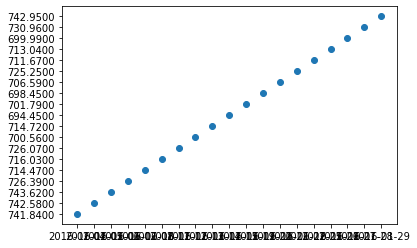

In [110]:
plt.scatter(stock_days, closing_data)

In [111]:
tsd

{'2020-06-25': {'1. open': '1429.9000',
  '2. high': '1442.9000',
  '3. low': '1420.0000',
  '4. close': '1441.3300',
  '5. volume': '1220411'},
 '2020-06-24': {'1. open': '1461.5100',
  '2. high': '1475.4200',
  '3. low': '1429.7500',
  '4. close': '1431.9700',
  '5. volume': '1756022'},
 '2020-06-23': {'1. open': '1455.6400',
  '2. high': '1475.9400',
  '3. low': '1445.2400',
  '4. close': '1464.4100',
  '5. volume': '1429764'},
 '2020-06-22': {'1. open': '1429.0000',
  '2. high': '1452.7500',
  '3. low': '1423.2100',
  '4. close': '1451.8600',
  '5. volume': '1542440'},
 '2020-06-19': {'1. open': '1444.0000',
  '2. high': '1447.8000',
  '3. low': '1421.3500',
  '4. close': '1431.7200',
  '5. volume': '3157875'},
 '2020-06-18': {'1. open': '1449.1600',
  '2. high': '1451.4100',
  '3. low': '1427.0100',
  '4. close': '1435.9600',
  '5. volume': '1581916'},
 '2020-06-17': {'1. open': '1447.1600',
  '2. high': '1460.0000',
  '3. low': '1431.3800',
  '4. close': '1451.1200',
  '5. volume